count                           mean                  min  \
Timestamp        525600  2022-04-25 12:00:30.000000768  2021-10-25 00:01:00   
GHI            525600.0                      230.55504                -12.7   
DNI            525600.0                     151.258469                  0.0   
DHI            525600.0                     116.444352                  0.0   
ModA           525600.0                     226.144375                  0.0   
ModB           525600.0                     219.568588                  0.0   
Tamb           525600.0                      27.751788                 14.9   
RH             525600.0                       55.01316                  3.3   
WS             525600.0                       2.368093                  0.0   
WSgust         525600.0                        3.22949                  0.0   
WSstdev        525600.0                        0.55774                  0.0   
WD             525600.0                     161.741845                  0.0   
WDstdev        525600.0                      10.559568                  0.0   
BP             525600.0                     975.915242                968.0   
Cleaning       525600.0                       0.000535                  0.0   
Precipitation  525600.0                       0.001382                  0.0   
TModA          525600.0                      32.444403                 13.1   
TModB          525600.0                       33.54333                 13.1   

                               25%                  50%                  75%  \
Timestamp      2022-01-24 06:00:45  2022-04-25 12:00:30  2022-07-25 18:00:15   
GHI                           -2.2                  2.1                442.4   
DNI                            0.0                  0.0                246.4   
DHI                            0.0                  2.5                215.7   
ModA                           0.0                  4.4              422.525   
ModB                           0.0                  4.3                411.0   
Tamb                          24.2                 27.2                 31.1   
RH                            26.5                 59.3                 80.8   
WS                             1.4                  2.2                  3.2   
WSgust                         1.9                  2.9                  4.4   
WSstdev                        0.4                  0.5                  0.7   
WD                            74.8                199.1                233.5   
WDstdev                        6.9                 10.8                 14.1   
BP                           975.0                976.0                977.0   
Cleaning                       0.0                  0.0                  0.0   
Precipitation                  0.0                  0.0                  0.0   
TModA                         23.9                 28.4                 40.6   
TModB                         23.6                 28.4                 43.0   

                               max         std  
Timestamp      2022-10-25 00:00:00         NaN  
GHI                         1424.0  322.532347  
DNI                         1004.5  250.956962  
DHI                          805.7  156.520714  
ModA                        1380.0  317.346938  
ModB                        1367.0   307.93251  
Tamb                          41.4    4.758023  
RH                            99.8   28.778732  
WS                            16.1    1.462668  
WSgust                        23.1    1.882565  
WSstdev                        4.7    0.268923  
WD                           360.0   91.877217  
WDstdev                       86.9     5.91549  
BP                           983.0    2.153977  
Cleaning                       1.0    0.023116  
Precipitation                  2.3     0.02635  
TModA                         70.4   10.998334  
TModB                         94.6   12.769277

✅ No missing values found.


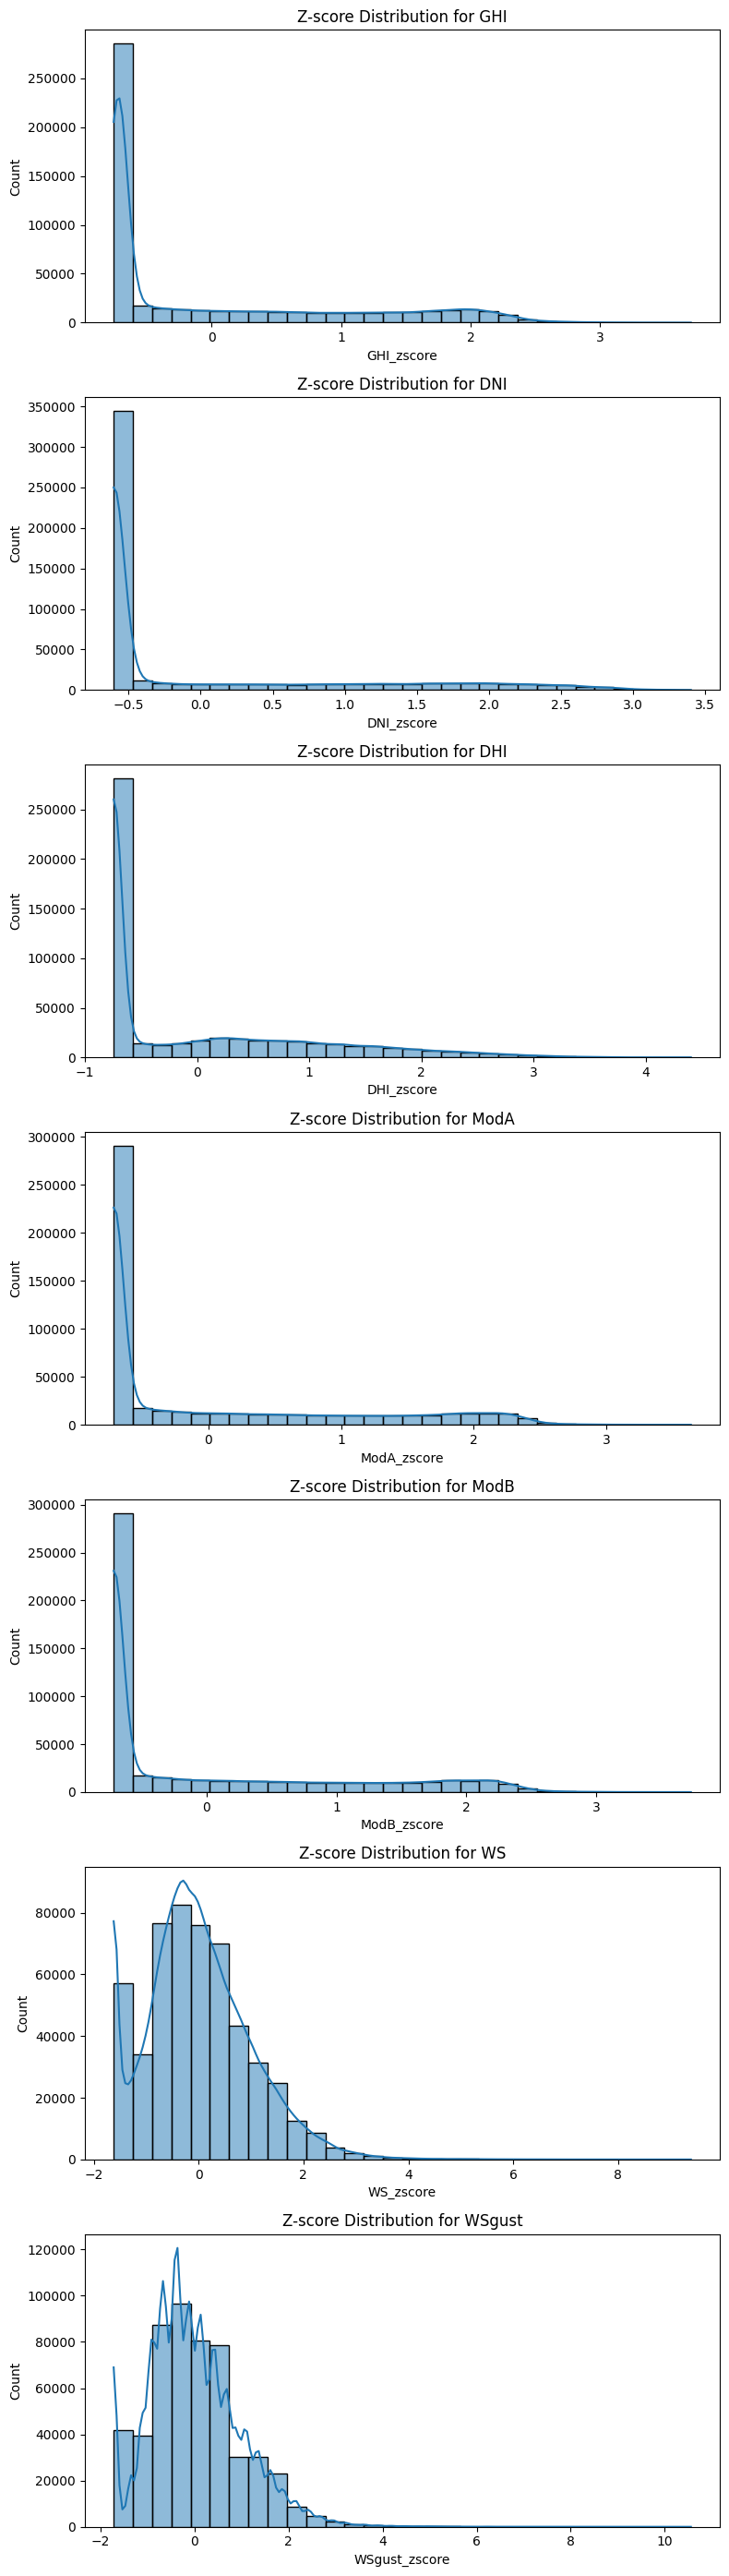

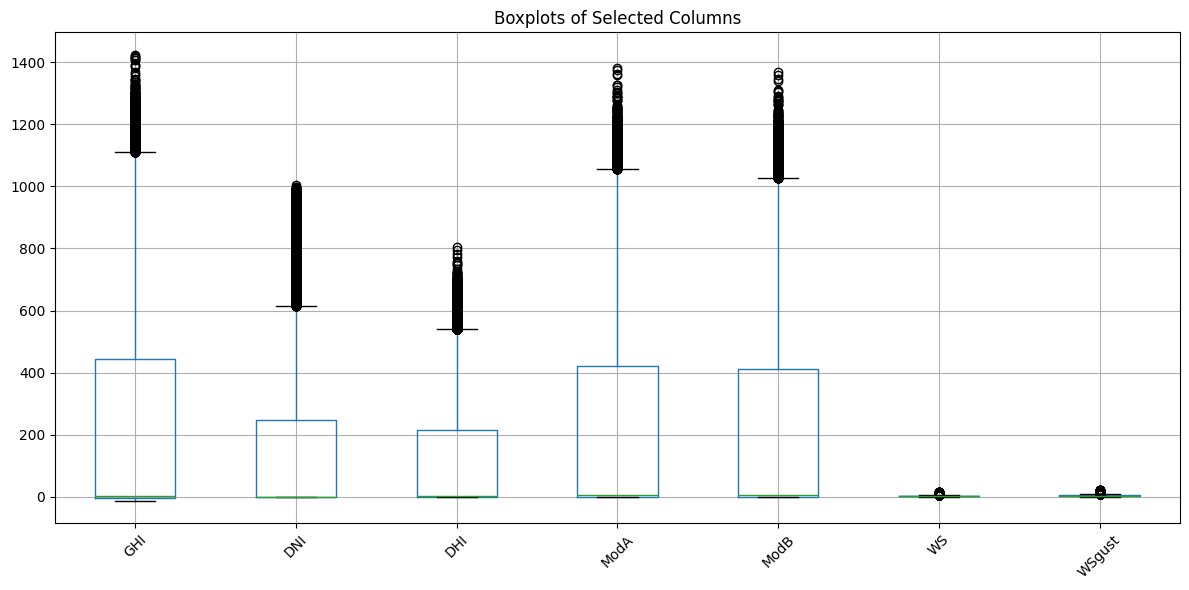

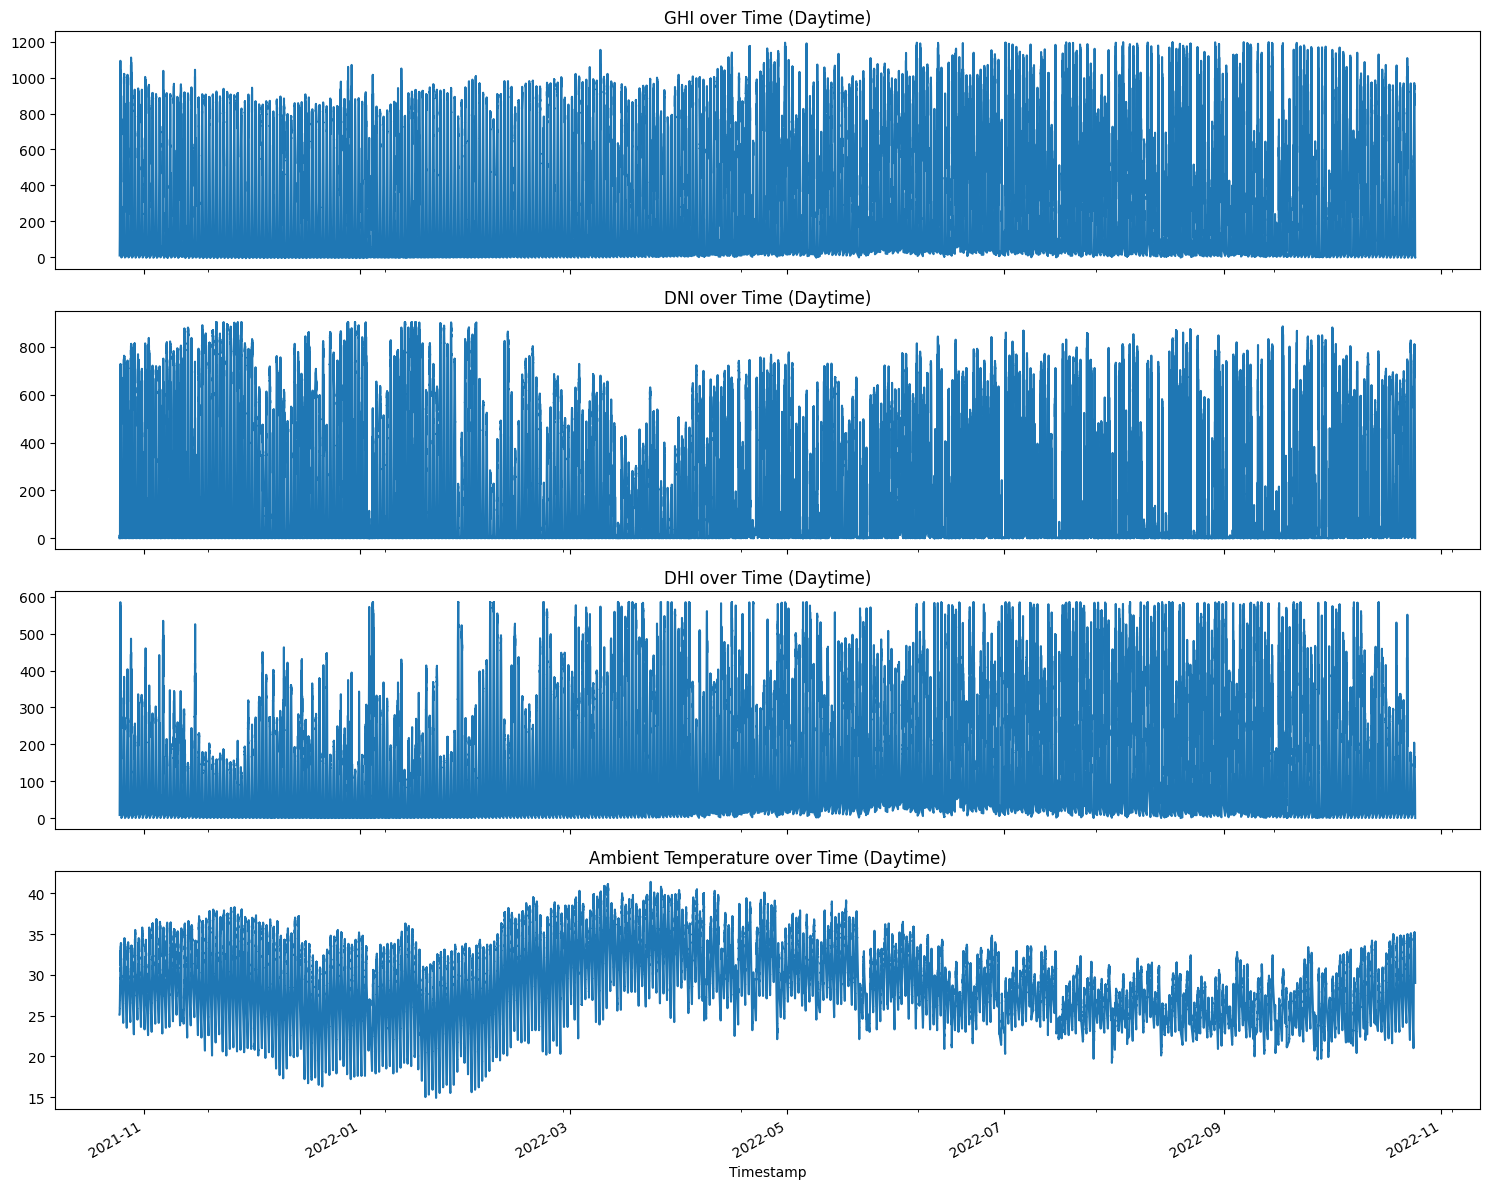

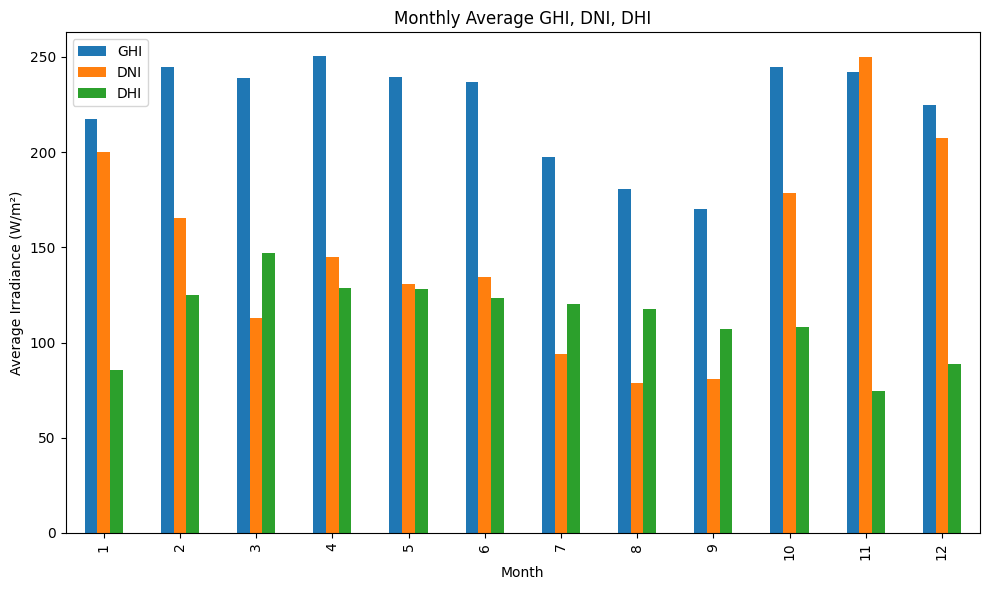

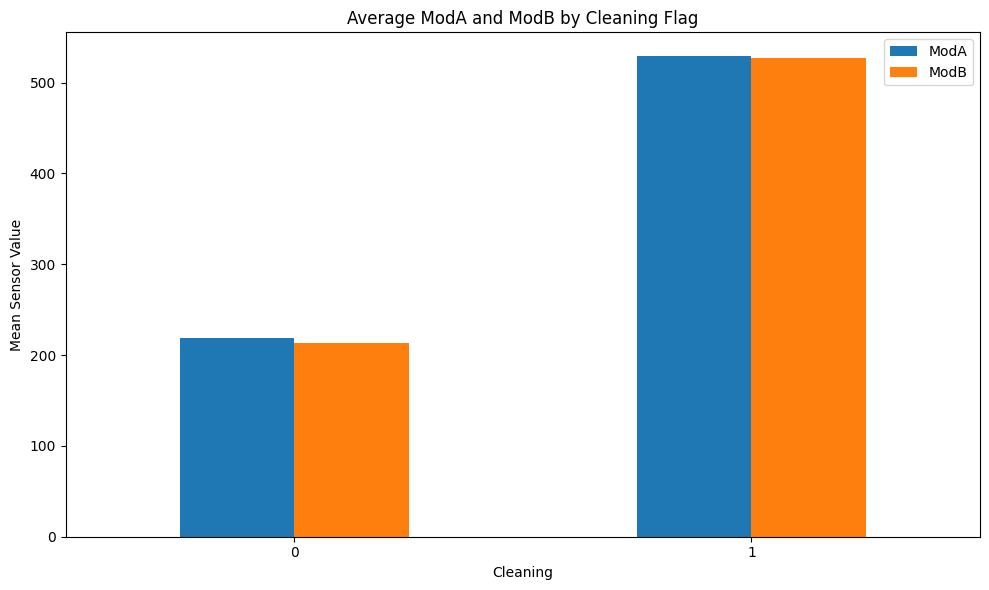

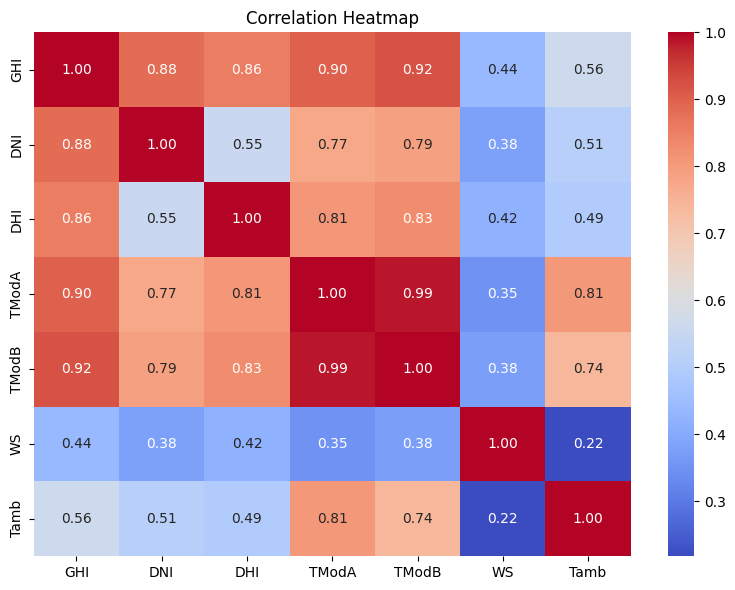

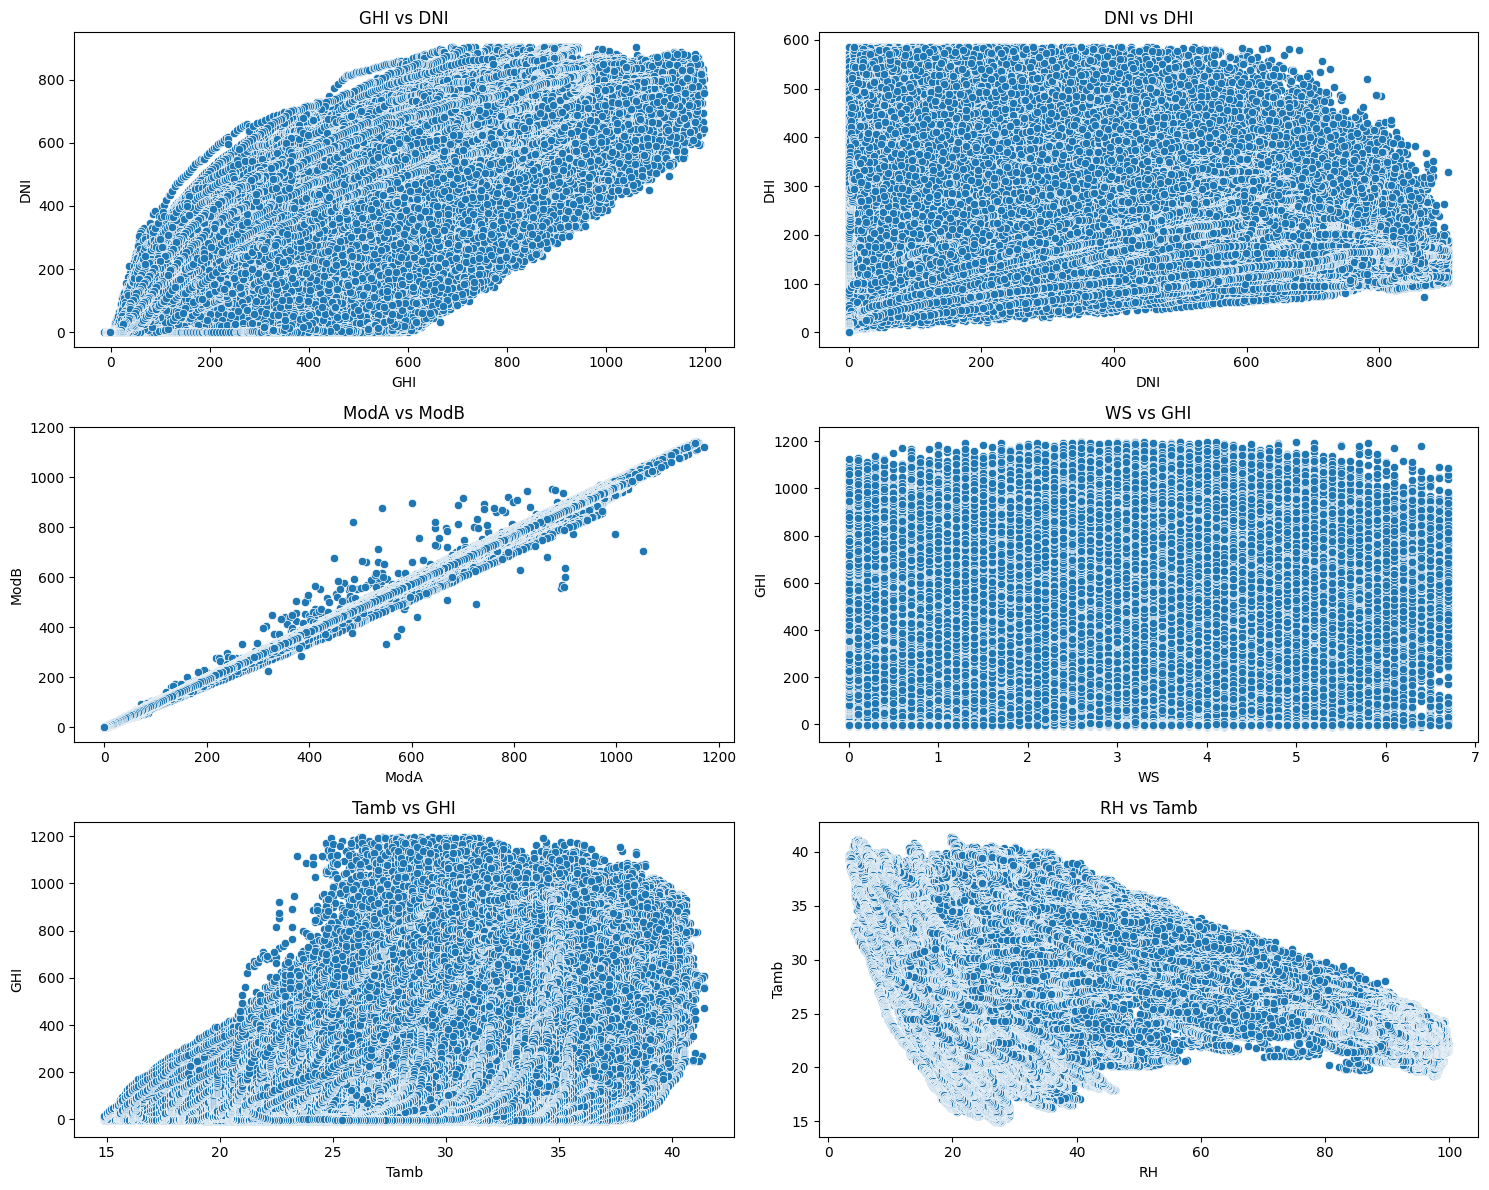

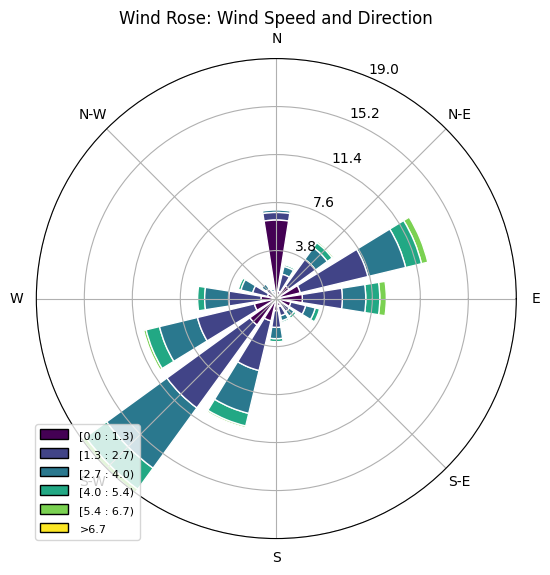

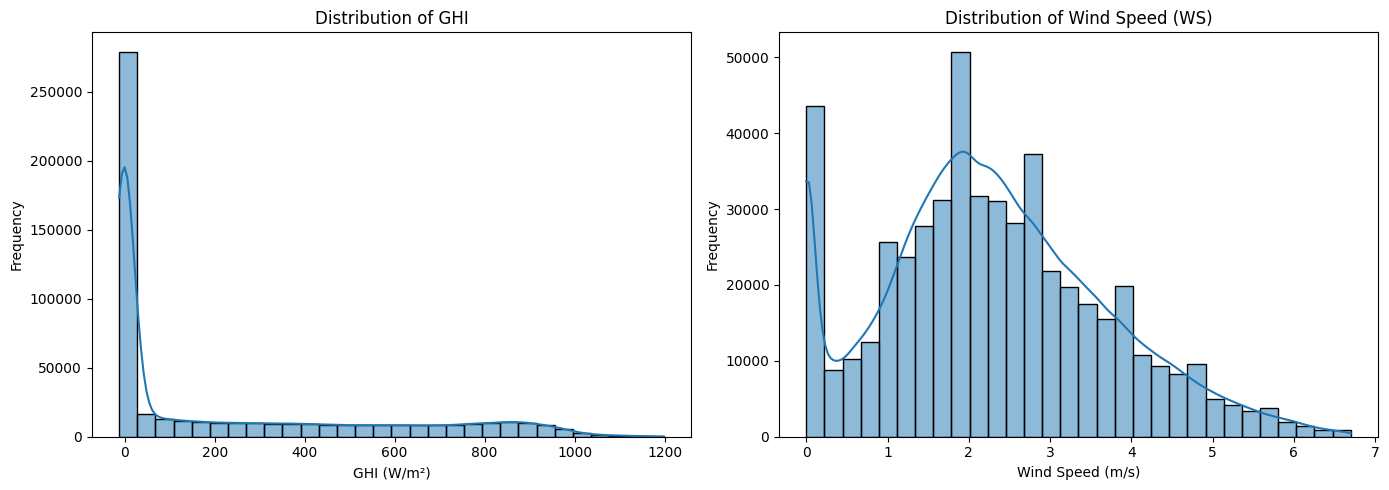

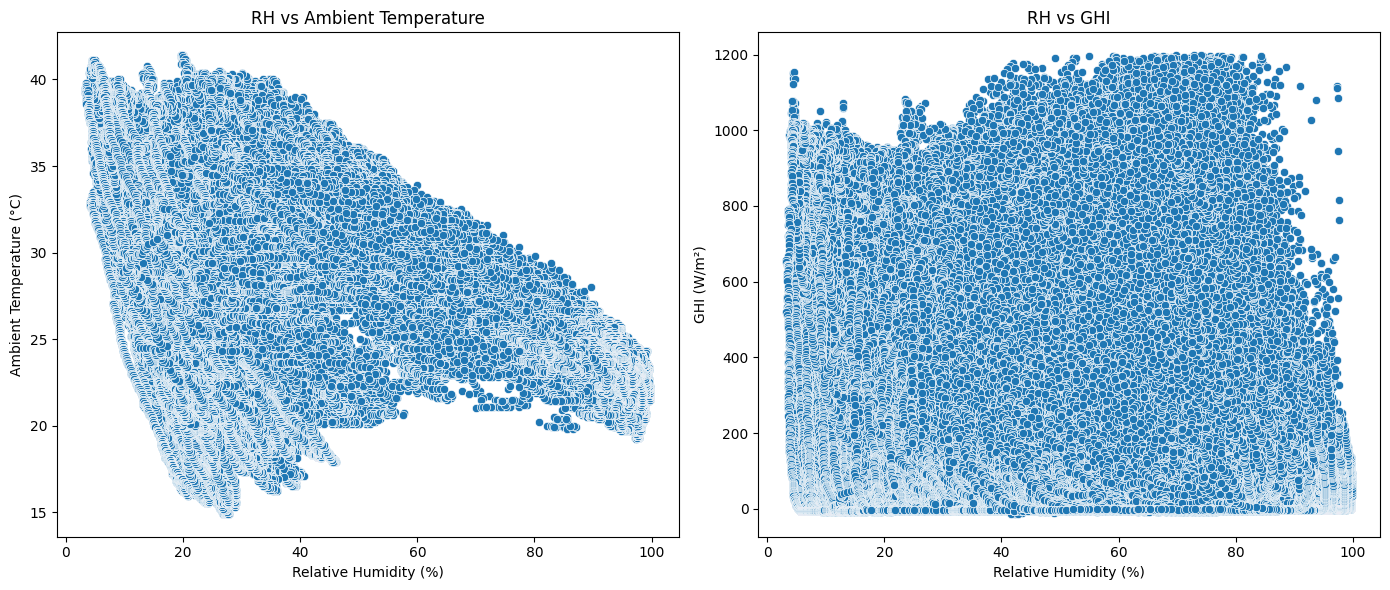

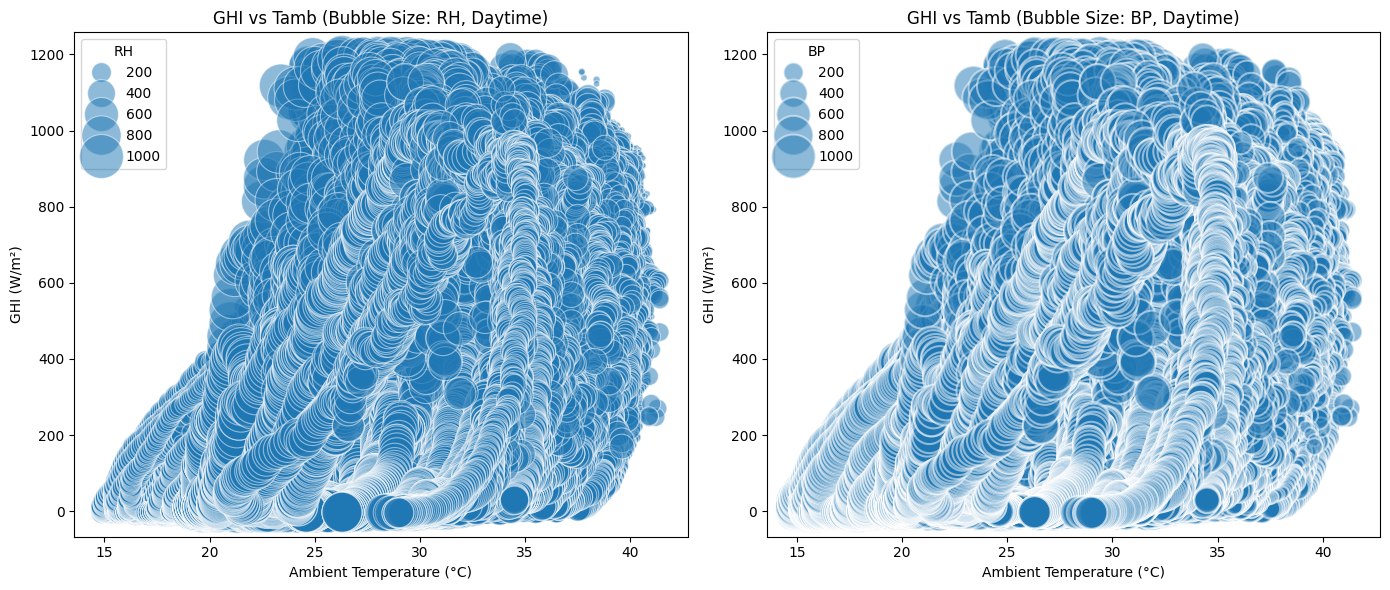

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))  # Ensure project root is in path

from scripts.data_loading import load_data
from scripts.data_summary import summarize_statistics, report_missing_values
from scripts.outlier_detection import compute_z_scores, plot_zscore_distribution, plot_boxplots
from scripts.data_cleaning import handle_negative_irradiance, clean_outliers_and_missing
from scripts.eda_plots import (
    plot_time_series, plot_monthly_avg, plot_cleaning_impact,
    plot_correlation_heatmap, plot_scatter_plots, plot_wind_rose,
    plot_histograms, plot_temperature_analysis, plot_bubble_chart
)

import pandas as pd

# Create figures directory if it doesn't exist
os.makedirs('figures', exist_ok=True)

# Load data
filepath = "../data/togo-dapaong_qc.csv"
df = load_data(filepath)

# Define columns for correlation and scatter plots
corr_columns = ["GHI", "DNI", "DHI", "TModA", "TModB", "WS", "Tamb"]
scatter_pairs = [("GHI", "DNI"), ("DNI", "DHI"), ("ModA", "ModB"), ("WS", "GHI"), ("Tamb", "GHI"), ("RH", "Tamb")]

# Summary and missing values
summarize_statistics(df)
report_missing_values(df)

# Outlier detection
columns_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
df_z = compute_z_scores(df, columns_to_check)
plot_zscore_distribution(df_z, columns_to_check)
plot_boxplots(df_z, columns_to_check)

# Cleaning
irradiance_columns = ["GHI", "DNI", "DHI"]
df = handle_negative_irradiance(df, irradiance_columns)
df_clean = clean_outliers_and_missing(df_z, columns_to_check)
df_clean.to_csv("../data/togo-dapaong_qc_clean.csv", index=False)

# Set datetime index
df_clean["Timestamp"] = pd.to_datetime(df_clean["Timestamp"])
df_clean.set_index("Timestamp", inplace=True)

# Filter for daytime values
df_daytime = df_clean.between_time("06:00", "18:00")

# EDA plots
plot_time_series(df_daytime)
plot_monthly_avg(df_clean)
plot_cleaning_impact(df_clean)
plot_correlation_heatmap(df_clean, corr_columns)
plot_scatter_plots(df_clean, scatter_pairs)
plot_wind_rose(df_clean)
plot_histograms(df_clean)
plot_temperature_analysis(df_clean)
plot_bubble_chart(df_daytime)
